In [1]:
# import libraries for ProjectGurukul Credit Card Fraud Detection Project using Machine Learning:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report

In [2]:
#Loading the dataset to a Pandas Dataframe

credit_card_data = pd.read_csv('creditcard.csv')

In [3]:
# let's see first 5 rows of the dataset:
credit_card_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
# let's see last 5 rows of our dataset:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
13949,24754,1.252924,-0.182189,-0.802716,-0.210981,1.916713,3.643624,-0.778711,0.818295,1.706962,...,-0.497088,-1.211285,0.043809,0.964159,0.442030,0.261483,-0.051402,0.005112,23.74,0.0
13950,24756,-0.346979,-2.103284,-0.685061,1.961605,-0.401125,0.473632,1.133816,-0.256528,0.893409,...,0.359662,-0.316275,-0.864259,-0.279881,0.491802,-0.353996,-0.149931,0.129795,794.20,0.0
13951,24759,-6.053652,-5.988723,0.810413,-0.011811,1.308135,-0.590803,-0.725838,-0.234840,1.624646,...,-0.771970,1.474668,3.176363,-0.302410,0.052529,-0.373871,-0.700463,2.508443,60.00,0.0
13952,24759,1.169121,-1.284945,0.032717,-0.681670,0.660598,4.412578,-1.913115,1.076592,1.501230,...,-0.557596,-0.882435,-0.041523,0.975445,0.297229,0.550515,0.015029,0.032067,90.00,0.0
13953,24759,-6.917152,5.854171,-1.652458,-1.488884,-0.833891,-0.344418,0.393789,0.379968,6.133597,...,-1.404681,-1.124694,0.174333,-0.528234,0.990685,-0.035875,1.071374,-0.168831,NaN,NaN


In [5]:
# dataset information:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    13954 non-null  int64  
 1   V1      13954 non-null  float64
 2   V2      13954 non-null  float64
 3   V3      13954 non-null  float64
 4   V4      13954 non-null  float64
 5   V5      13954 non-null  float64
 6   V6      13954 non-null  float64
 7   V7      13954 non-null  float64
 8   V8      13954 non-null  float64
 9   V9      13954 non-null  float64
 10  V10     13954 non-null  float64
 11  V11     13954 non-null  float64
 12  V12     13954 non-null  float64
 13  V13     13954 non-null  float64
 14  V14     13954 non-null  float64
 15  V15     13954 non-null  float64
 16  V16     13954 non-null  float64
 17  V17     13954 non-null  float64
 18  V18     13954 non-null  float64
 19  V19     13954 non-null  float64
 20  V20     13954 non-null  float64
 21  V21     13954 non-null  float64
 22

In [6]:
# checking number of missing values:
credit_card_data.isnull().sum()

# Find distribution of Normal transaction or Fraud transaction:
credit_card_data['Class'].value_counts()

Class
0.0    13897
1.0       56
Name: count, dtype: int64

(13897, 31)
(56, 31)


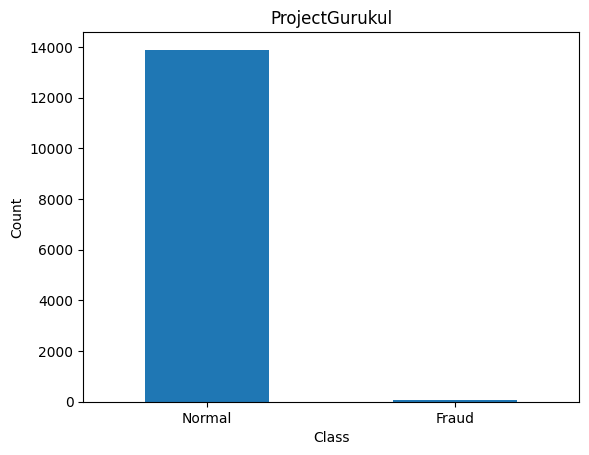

In [7]:
# Separating the data:
normal = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]
# check shape
print(normal.shape)
print(fraud.shape)

#visualize the data:
labels = ["Normal", "Fraud"]
count_classes = credit_card_data.value_counts(credit_card_data['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("ProjectGurukul")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

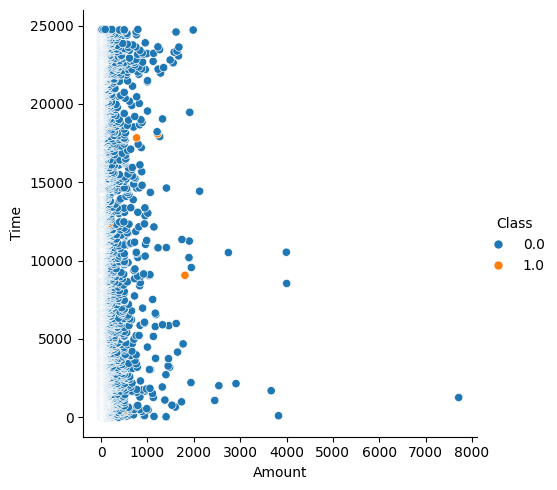

In [8]:
# statistical measures of the data:
normal.Amount.describe()
fraud.Amount.describe()

# visualize the data using seaborn:
sns.relplot(x = 'Amount' , y = 'Time' , hue = 'Class', data = credit_card_data)

In [10]:
# Compare values of both transactions:
credit_card_data.groupby('Class').mean()

# Now we will build a sample dataset containing similar distribution of normal transaction and fraud transaction:
normal_sample = normal.sample(n=492)
# Concat two data ( normal_sample and fraud) to create new dataframe which consist equal number of fraud transactions and normal transactions, In this way we balance our dataset (As our dataset is highly unbalanced initially) :
credit_card_new_data = pd.concat([normal_sample, fraud], axis=0)
#Let’s see our new dataset:
credit_card_new_data

# Analyse our new dataset:
credit_card_new_data['Class'].value_counts()

Class
0.0    492
1.0     56
Name: count, dtype: int64

In [11]:
# Splitting data into features and targets
X = credit_card_new_data.drop('Class', axis=1)
Y = credit_card_new_data['Class']

# splitting the data into training and testing data:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state= 2)
print(X.shape, X_train.shape, X_test.shape)

(548, 30) (438, 30) (110, 30)


In [12]:
# Creating Model:
model = LogisticRegression()
# training the Logistic Regression model with training data:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
# Model Evaluation
X_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, Y_train)
print('Accuracy of Training data:', training_data_accuracy)

Accuracy of Training data: 0.9885844748858448


In [14]:
# classification report of the model on training data:
print(classification_report(X_train_pred, Y_train))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       394
         1.0       0.93      0.95      0.94        44

    accuracy                           0.99       438
   macro avg       0.96      0.97      0.97       438
weighted avg       0.99      0.99      0.99       438



In [15]:
# accuracy on test data:
X_test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)
print('Accuracy of Testing data:', test_data_accuracy)

# confusion matrix and classification report of test data:
print(confusion_matrix(X_test_pred, Y_test))
print(classification_report(X_test_pred, Y_test))

Accuracy of Testing data: 0.9454545454545454
[[94  1]
 [ 5 10]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97        95
         1.0       0.91      0.67      0.77        15

    accuracy                           0.95       110
   macro avg       0.93      0.83      0.87       110
weighted avg       0.94      0.95      0.94       110

